<a href="https://colab.research.google.com/github/Machocho254/Hass-Consulting-House-Data/blob/master/Moringa_DS_Core_WEEK7_IP_Machocho_Mengo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORTING ALL THE NECESSARY LIBRARIES**

In [0]:
# Importing libraries

# for data analysis and manipulation
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

# for regression analysis
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix


import requests
from io import StringIO
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


### **LOADING AND PREVIEW OF THE DATASET**

In [8]:
# loading the dataset and previewing the first observations

house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# previewing the last observations of the data
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [10]:
# information about the dataset

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [11]:
# getting description about the data

house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
# to get the number of rows and columns

house.shape

(21613, 20)

THe data has 20 variables and 21613 observations

### **DATA CLEANING**

In [13]:
# checking for missing values

house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The data has no missing values. 

In [14]:
# checking for duplicates

house.duplicated().any()

True

In [0]:
# removing the duplicates

house.drop_duplicates(keep='first', inplace = True)

In [16]:
# checking whether the duplicates have been dropped

house.duplicated().any()

# duplicates have been dropped.

False

#### **Outlier Management**

In [17]:
# GETTing the column names 

house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

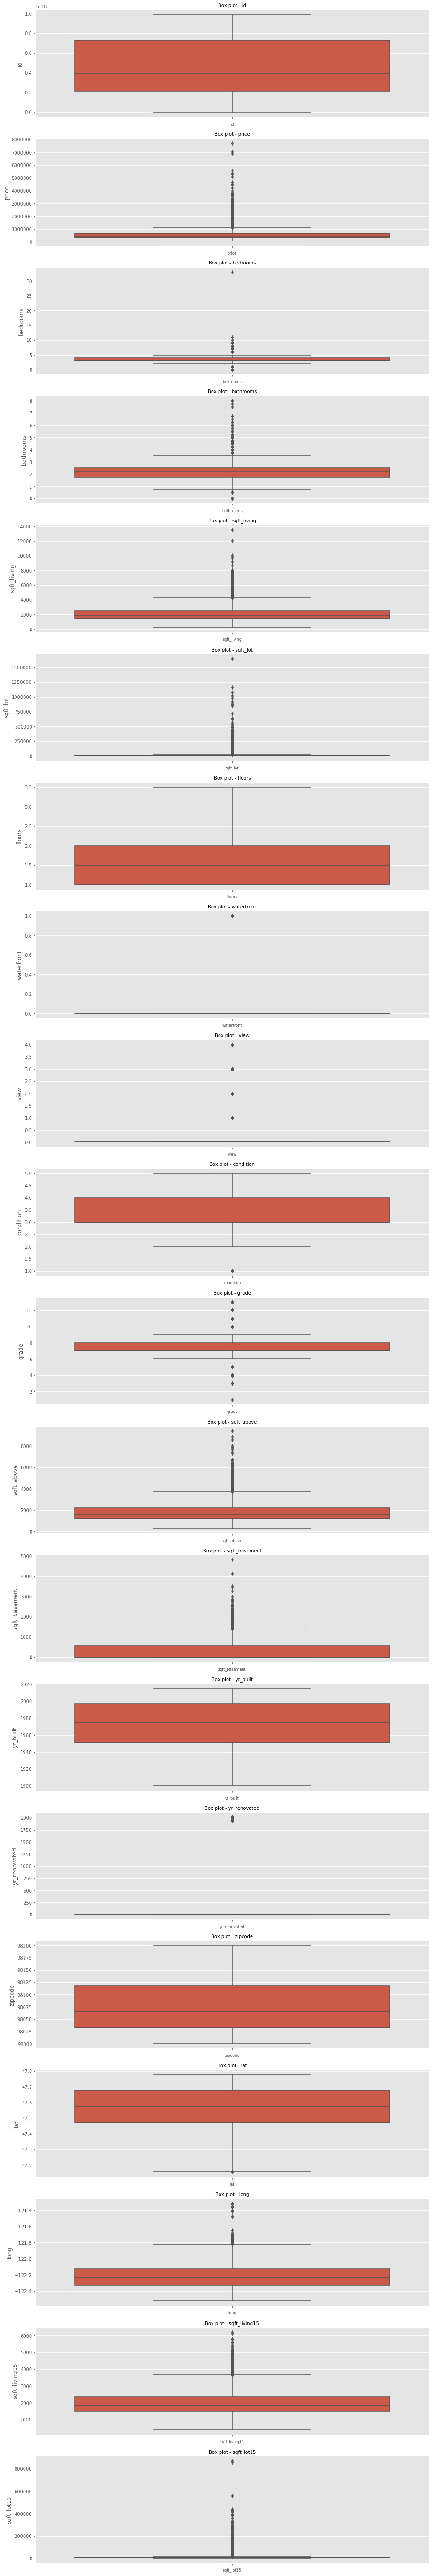

In [27]:
# getting the outliers using boxplots

def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(15,100))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    plt.show()

#Execute the function
col_names = house.columns
target_dataframe = house
plot_boxplots(target_dataframe,col_names)

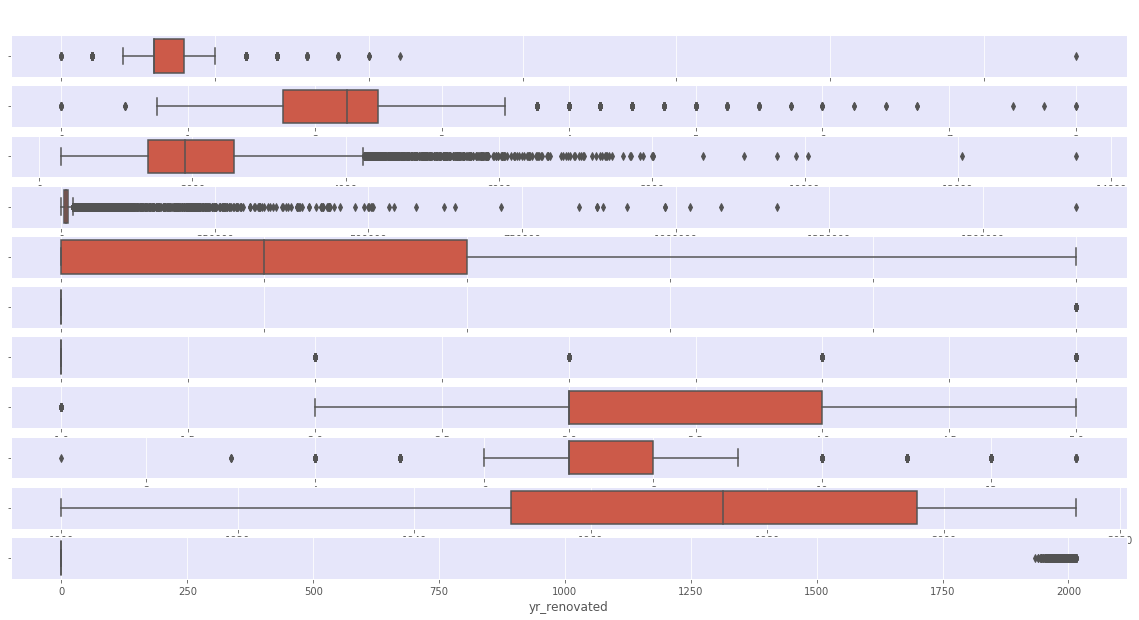

In [28]:
# another approach

# creating a list of columns to check for outliers
# creating a list of colours

# col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']
col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'rebeccapurple', 'darkolivegreen', 'forestgreen', 'midnightblue', 'indigo', 'darkviolet', 'greenyellow']
 
# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 11, ncols = 1, figsize = (20, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'white')
for ax, data, column, color in zip(axes.flatten(), house, col, colors):
  sns.boxplot(house[column], ax = ax)
  ax.set_facecolor('lavender') # Setting the background color to lavender

In [0]:
# dropping the outliers

outliers = house[(house['bedrooms'] > 30) | (house['sqft_living'] > 11000) | (house['sqft_lot'] > 1250000) | (house['sqft_basement'] > 4000) | (house['sqft_lot15'] > 300000)].index
df = house.drop(outliers)

### **Checking for the unique values**

More steps into data reading and understading by lookin at the unique values and getting more insight about the data. 

In [21]:
# finding unque values for bedrooms

df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

In [22]:
# finidng the unique values for bathroom
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 7.5 , 7.75, 6.25, 6.5 ])

## **EXPLORATORY DATA ANALYSIS**

### **UNIVARIATE ANALYSIS**

To get the measures of central tendencies and measures of dispersion (spread)

To get:


1.   Mean
2.   Mode
3.   Median
4.   Variance
5.   Standard deviation

Using the describe() function to find the mean, median, standard deviation and variance of the data. 



#### **Arithmetic mean of each column**

In [31]:
# finding the mean for the columns

from statistics import mean, median, mode, stdev

print ("The mean of the price is ", df['price'].mean())

print ("The mean of the bedrooms is ", df['bedrooms'].mean())

print ("The mean of the bathrooms is ", df['bathrooms'].mean())

print ("The mean of the Square feet of living room is ", df['sqft_living'].mean())

print ("The mean of the Squarefeet of parking lot is ", df['sqft_lot'].mean())

print ("The mean of the NUmber of floors is ", df['floors'].mean())

print ("The mean of the waterfront is ", df['waterfront'].mean())

print ("The mean of the View is ", df['view'].mean())

print ("The mean of the Condtion is ", df['condition'].mean())

print ("The mean of the Grade is ", df['grade'].mean())

print ("The mean of the Squarefeet of above floor is ", df['sqft_above'].mean())

print ("The mean of the size of baseent in squarefeet is ", df['sqft_basement'].mean())
# df[''].mean()

The mean of the price is  539443.7336916234
The mean of the bedrooms is  3.3692550037064493
The mean of the bathrooms is  2.113718495181616
The mean of the Square feet of living room is  2077.787203484062
The mean of the Squarefeet of parking lot is  14695.999722016308
The mean of the NUmber of floors is  1.4940928465530021
The mean of the waterfront is  0.007505559673832468
The mean of the View is  0.23327464788732394
The mean of the Condtion is  3.409423647146034
The mean of the Grade is  7.655624536693847
The mean of the Squarefeet of above floor is  1786.8056893995551
The mean of the size of baseent in squarefeet is  290.98151408450707


#### **Median of each column**

In [32]:
# to find the median of the dataframe

print ("The median of the price is ", df['price'].median())

print ("The median of the bedrooms is ", df['bedrooms'].median())

print ("The median of the bathrooms is ", df['bathrooms'].median())

print ("The median of the Square feet of living room is ", df['sqft_living'].median())

print ("The median of the Squarefeet of parking lot is ", df['sqft_lot'].median())

print ("The median of the NUmber of floors is ", df['floors'].median())

print ("The median of the waterfront is ", df['waterfront'].median())

print ("The median of the View is ", df['view'].median())

print ("The median of the Condtion is ", df['condition'].median())

print ("The median of the Grade is ", df['grade'].median())

print ("The median of the Squarefeet of above floor is ", df['sqft_above'].median())

print ("The median of the size of baseent in squarefeet is ", df['sqft_basement'].median())

The median of the price is  450000.0
The median of the bedrooms is  3.0
The median of the bathrooms is  2.25
The median of the Square feet of living room is  1910.0
The median of the Squarefeet of parking lot is  7613.5
The median of the NUmber of floors is  1.5
The median of the waterfront is  0.0
The median of the View is  0.0
The median of the Condtion is  3.0
The median of the Grade is  7.0
The median of the Squarefeet of above floor is  1560.0
The median of the size of baseent in squarefeet is  0.0


In [0]:
# mode of the dataframe

df.mode()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,795000620.0,350000.0,3.0,2.5,1300.0,5000.0,1.0,0.0,0.0,3.0,7.0,1300.0,0.0,2014.0,0.0,98103.0,47.5322,-122.29,1540.0,5000.0
1,NaN,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.5491,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6624,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6846,NaN,NaN,NaN


#### **Measures of dispersion**

In [33]:
# to get the variance 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.var()

id              8272976227803638784.000
price                  131637016909.527
bedrooms                          0.823
bathrooms                         0.588
sqft_living                  828681.477
sqft_lot                 1405672081.708
floors                            0.292
waterfront                        0.007
view                              0.584
condition                         0.424
grade                             1.377
sqft_above                   679014.883
sqft_basement                193682.298
yr_built                        862.608
yr_renovated                 160880.790
zipcode                        2863.316
lat                               0.019
long                              0.020
sqft_living15                469306.457
sqft_lot15                550289910.976
dtype: float64

In [34]:
# standard deviatiion

df.std()

id              2876278190.267
price               362818.160
bedrooms                 0.907
bathrooms                0.767
sqft_living            910.319
sqft_lot             37492.294
floors                   0.540
waterfront               0.086
view                     0.765
condition                0.651
grade                    1.173
sqft_above             824.024
sqft_basement          440.094
yr_built                29.370
yr_renovated           401.099
zipcode                 53.510
lat                      0.138
long                     0.141
sqft_living15          685.059
sqft_lot15           23458.259
dtype: float64

####  **Frequency tables and Histograms**

In [0]:
# 

#### **BIVARIATE ANALYSIS**

Since the variables are all numerical in nature, the analysis will be scatter plots and linear correlation



The response variable is the price of the house. We are trying to study the relationship between the predictor variables and the response variable. 

The predictor variables to be considered in this study will be:


*   THe number of bedrooms
*   The number of bathrooms
*   THe size of the living room
*   The size of the parking lot
*   THe number of floors in the house



**Number of bedrooms vs Price of the house**

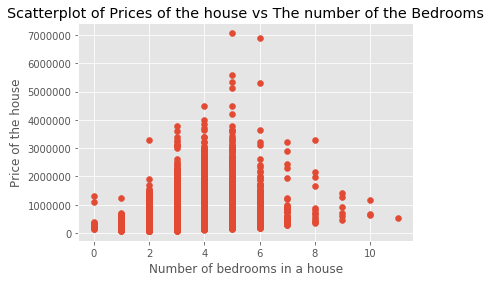

In [35]:
# scatterplot of Price of the house vs THe number of bedrooms in the house

plt.scatter(df["bedrooms"] , df["price"])
plt.title('Scatterplot of Prices of the house vs The number of the Bedrooms')
plt.xlabel('Number of bedrooms in a house')
plt.ylabel('Price of the house')
plt.show()

In [36]:
# Calculating the pearson coefficient
pearson_coeff = df["price"].corr(df["bedrooms"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["price"].corr(df["bedrooms"]) 
print(coeff)

0.31553939526304486
0.31553939526304486


There is a positive correlation between the number of the bedrooms and the price of the house. The correlation is however low, as it is < 0.5. This translates to when there is an increase in the number of the bedrooms, th price of the house increases.  

**Number of Bathrooms vs Price of the house**

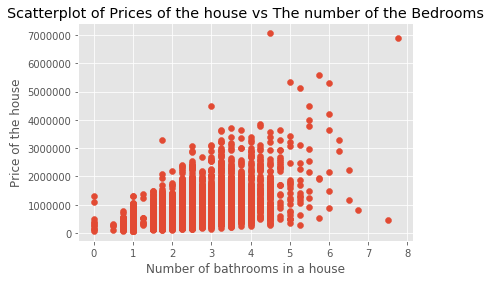

In [38]:
# scatterplot of the number of bathrooms in correlation to price of the house
plt.scatter(df["bathrooms"] , df["price"])
plt.title('Scatterplot of Prices of the house vs The number of the Bedrooms')
plt.xlabel('Number of bathrooms in a house')
plt.ylabel('Price of the house')
plt.show()


In [40]:
# Calculating the pearson coefficient
pearson_coeff = df["price"].corr(df["bathrooms"], method="pearson") 
print(pearson_coeff)


0.5215257677268599


There is a high positive correlation between the numeber of bathrooms in the house and the price of the house. This translates to, for every increase in the number of the bathrooms, the price of the house increases by 0.521525.